## Import the relevant libraries

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

## Load the data

In [8]:
raw_data = pd.read_csv('2.01. Admittance.csv')
raw_data

SAT Admitted
0    1363       No
1    1792      Yes
2    1954      Yes
3    1653       No
4    1593       No
..    ...      ...
163  1722      Yes
164  1750      Yes
165  1555       No
166  1524       No
167  1461       No

[168 rows x 2 columns]

In [10]:
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes':1, 'No':0})
data

SAT  Admitted
0    1363         0
1    1792         1
2    1954         1
3    1653         0
4    1593         0
..    ...       ...
163  1722         1
164  1750         1
165  1555         0
166  1524         0
167  1461         0

[168 rows x 2 columns]

## Declare the variables

In [13]:
y = data['Admitted']
x1 = data['SAT']

## Regression

In [18]:
x = sm.add_constant(x1)
#1. Create reg_log, results_log: use LOGIT(instead of OLS)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


In [ ]:
#Output means...
#1. We managed to fit the regression
#2. StatsModels uses a machine learning algorithm to fit the regression
#3. The function value? The value of the 'objective function' at the 10th iteration

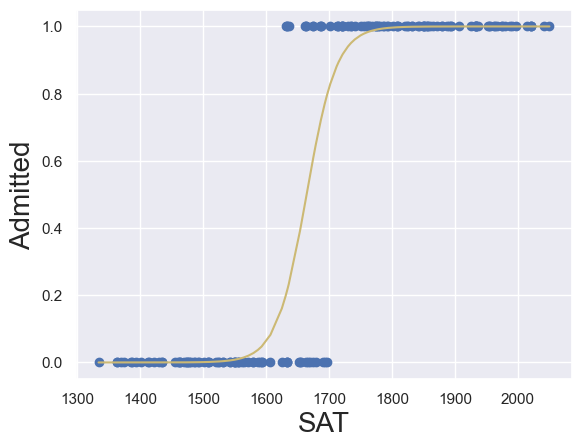

In [20]:
def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1) / (1 + np.exp(b0+x*b1)))

f_sorted = np.sort(f(x1,results_log.params.iloc[0], results_log.params.iloc[1]))
x_sorted = np.sort(np.array(x1))

plt.scatter(x1,y,color='C0')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('Admitted', fontsize=20)
plt.plot(x_sorted, f_sorted, color='C8')
plt.show()

In [22]:
#This function shows the probability of admission, given an SAT score(btw 0 and 1)
#If the score is below the mid-1500s, it is considered 0
#If it is above the mid-1700s, it is considered 1
#For scores in between, the acceptance probability varies based on the score
#logistic regression curve, binary prediction

## Summary

In [25]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Mon, 15 Jul 2024   Pseudo R-squ.:                  0.7992
Time:                        16:17:20   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [ ]:
#In case of an unexpected error, look for solutions on GitHub
#Error messages GOOGLING

In [29]:
x0 = np.ones(168)
#No. Observations = 168
reg_log = sm.Logit(y,x0)
results_log = reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.686044
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      167
Method:                           MLE   Df Model:                            0
Date:                Mon, 15 Jul 2024   Pseudo R-squ.:               7.410e-11
Time:                        16:50:09   Log-Likelihood:                -115.26
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2392      0.155      1.539      0.124      -0.065       0.544
==============================================================================
"""

In [ ]:
#LL-null value -> Log-Likelihood!
#The LL-null value is the Log-Likelihood when only an array of 1s (i.e., x0 = constant) is present